### The goal of this project is to provide a descriptive analysis of Amazon sales for each category of items in 2023 thus far.


The data is split into 140 csv files containing information on the 
* name
* category
* sub category 
* product image link
* link to the product 
* rating 
* number of ratings 
* discount prices
* mrp prices in rupees

We begin this project by joining our csv's into one pandas dataframe



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# Get the file directories so we can read the csv files
DATA_PATH = 'data/'
files = os.listdir(DATA_PATH)

# read each csv, append to a list
data_frames = []
for f_name in files:
    df = pd.read_csv(DATA_PATH+f_name)
    data_frames.append(df)

In [74]:
# we want to append the rows from each dataframe to eachother so we use pd.concat
amazon_data = pd.concat(data_frames)
amazon_data.head()

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price,Unnamed: 0
0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/31UISB90sY...,https://www.amazon.in/Lloyd-Inverter-Convertib...,4.2,"2,255","₹32,999","₹58,990",NaN
1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.2,"2,948","₹46,490","₹75,990",NaN
2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Inverter-Convertible-...,4.2,"1,206","₹34,490","₹61,990",NaN
3,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.0,69,"₹37,990","₹68,990",NaN
4,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/41lrtqXPiW...,https://www.amazon.in/Carrier-Inverter-Split-C...,4.1,630,"₹34,490","₹67,790",NaN


In [75]:
amazon_data = amazon_data.drop(columns=['Unnamed: 0'],axis=1)

Now that we have our data compiled into one pandas dataframe, we can begin to think about what columns are not  
necessary for our analysis, since we're strictly focused on analyzing sales trends for each product category  
it is not necessary to have the individual names for each item, the image and link data are also not needed

In [76]:
amazon_data = amazon_data.drop(columns=['image','link','name'])

In [77]:
amazon_data.shape

(1103170, 6)

In [78]:
# Check datatypes of each column
amazon_data.dtypes

main_category     object
sub_category      object
ratings           object
no_of_ratings     object
discount_price    object
actual_price      object
dtype: object

In [79]:
# Check for null values
amazon_data.isnull().sum()

main_category          0
sub_category           0
ratings           351588
no_of_ratings     351588
discount_price    122326
actual_price       35626
dtype: int64

We see that in our dataset there is a significant number of missing values, the dataset contains  
about 1.1 million rows of which we have third missing for ratings, number of ratings, a tenth   
missing for discount prices, and 1/30th missing for the mrp price

Each of the columns are meant to be numerical types, so we'll perform type conversion  
and then consider imputing the missing data

In [80]:
amazon_data['actual_price'] = amazon_data['actual_price'].str.replace('₹','')
amazon_data['actual_price'] = amazon_data['actual_price'].str.replace(',','').astype(float)

amazon_data['discount_price'] = amazon_data['discount_price'].str.replace('₹','')
amazon_data['discount_price'] = amazon_data['discount_price'].str.replace(',','').astype(float)

amazon_data.head()

,main_category,sub_category,ratings,no_of_ratings,discount_price,actual_price
0,appliances,Air Conditioners,4.2,"2,255",32999.0,58990.0
1,appliances,Air Conditioners,4.2,"2,948",46490.0,75990.0
2,appliances,Air Conditioners,4.2,"1,206",34490.0,61990.0
3,appliances,Air Conditioners,4.0,69,37990.0,68990.0
4,appliances,Air Conditioners,4.1,630,34490.0,67790.0


In [81]:
amazon_data['ratings'].value_counts()

4.0       71525
5.0       64343
3.9       52679
3.8       49053
4.1       48745
          ...  
1.6           4
₹100          2
₹65           2
₹68.99        2
1.1           2
Name: ratings, Length: 88, dtype: int64

There looks to be prices included in the ratings column, lets take a look and see how 
many rows are affected

In [82]:
amazon_data['ratings'].str.contains('₹').value_counts()

False    733224
True         48
Name: ratings, dtype: int64

A negligible amount of rows contain price data in the ratings column, since there are only 48  
rows with this incorrect data it should not effect any later analysis if we drop these rows,  
before we drop these rows lets take a further look at the other columns in the associated rows

In [83]:
amazon_data[amazon_data['ratings'].str.contains('₹')==True]

,main_category,sub_category,ratings,no_of_ratings,discount_price,actual_price
57158,women's shoes,Ballerinas,₹68.99,Only 1 left in stock.,NaN,5123.0
224204,accessories,Handbags & Clutches,₹65,Usually dispatched in 6 to 7 days.,765.0,1200.0
277756,men's clothing,Innerwear,₹70,Usually dispatched in 4 to 5 weeks.,1790.0,2166.0
284642,men's clothing,Innerwear,₹70,Usually dispatched in 4 to 5 weeks.,1790.0,2166.0
286032,men's clothing,Innerwear,₹70,Usually dispatched in 4 to 5 weeks.,1790.0,2166.0
286033,men's clothing,Innerwear,₹70,Usually dispatched in 4 to 5 weeks.,1690.0,2045.0
299759,men's clothing,Jeans,₹100,Usually dispatched in 4 to 5 weeks.,2126.0,2573.0
368276,women's clothing,Lingerie & Nightwear,₹70,Usually dispatched in 4 to 5 weeks.,1790.0,2166.0
401191,bags & luggage,Rucksacks,₹99,Usually dispatched in 11 to 12 days.,6796.0,20388.0
401192,bags & luggage,Rucksacks,₹99,Usually dispatched in 11 to 12 days.,3945.0,11835.0


We see that essentially all the data in number of ratings column in the associated rows is also incorrect,  
before we deal with that we can check how many of the rows have ratings above 5 and below 1, given that  
ratings outside of the range 1 to 5 are not allowed on amazon

In [84]:
amazon_data['ratings'] = amazon_data['ratings'].str.replace('₹','')
amazon_data['ratings'].nunique() # We have 49 unique values, lets iterate over these values to see if there are any other strings

r_values = amazon_data['ratings'].unique()
r_values

array(['4.2', '4.0', '4.1', '4.3', '3.9', '3.8', '3.5', nan, '4.6', '3.3',
       '3.4', '3.7', '2.9', '5.0', '4.4', '3.6', '2.7', '4.5', '3.0',
       '3.1', '3.2', '4.8', '4.7', '2.5', '1.0', '2.6', '2.8', '2.3',
       '1.7', 'Get', '1.8', '2.4', '4.9', '2.2', '1.6', '1.9', '2.0',
       '1.4', '2.1', 'FREE', '1.2', '1.3', '1.5', '68.99', '65', '1.1',
       '70', '100', '99', '2.99'], dtype=object)

We see that the ratings columns contains the strings Get and FREE, we should check  
how many rows contain these values and decide whether to remove these rows based off that

In [85]:
amazon_data[amazon_data['ratings'].isin(['Get','FREE'])].shape

(12418, 6)

About 10% of our dataset contains these values in the ratings column, it should be safe
to remove the associated rows

In [86]:
amazon_data = amazon_data[~(amazon_data['ratings'].isin(['Get','FREE']))]
amazon_data.shape

(1090752, 6)

In [87]:
amazon_data['ratings'] = amazon_data['ratings'].astype(float)
amazon_data.head()

,main_category,sub_category,ratings,no_of_ratings,discount_price,actual_price
0,appliances,Air Conditioners,4.2,"2,255",32999.0,58990.0
1,appliances,Air Conditioners,4.2,"2,948",46490.0,75990.0
2,appliances,Air Conditioners,4.2,"1,206",34490.0,61990.0
3,appliances,Air Conditioners,4.0,69,37990.0,68990.0
4,appliances,Air Conditioners,4.1,630,34490.0,67790.0


Since Amazon ratings fall within the range of 1 to 5 stars we should check how much  
of our data falls outside of this range

In [108]:
amazon_data[(amazon_data['ratings'] > 5) | (amazon_data['ratings'] < 1)].shape

(44, 6)

Less than 1% of our data falls outside of this range so it is fine to drop those rows

Lets create a data of our dataset first and perform any more changes on the copy,  
just incase we make any errors

In [153]:
amazon_copy = amazon_data.copy()
amazon_copy.shape

(1090752, 6)

In [154]:
amazon_copy = amazon_copy.drop(amazon_copy[(amazon_copy['ratings'] > 5) | (amazon_copy['ratings'] < 1)].index)
amazon_copy.shape

(1089338, 6)

Lets now move onto dealing with the incorrect data in the number of ratings column,  
as we saw above there were many strings within the column

In [155]:
amazon_copy['no_of_ratings'] = amazon_copy['no_of_ratings'].str.replace(',','')

In [164]:
amazon_copy['no_of_ratings'] = pd.to_numeric(amazon_copy['no_of_ratings'],errors='coerce')

Now that we have converted all the fields that could not be casted to a float to NaN values,  
lets see how we can impute the missing values

What we can do is impute the NaN values in the ratings, discount price, and mrp price  
column by calculating the mean value of items of the same sub category, and for the  
number of items sold we can do the same but replace with the median

In [193]:
# Lets start by calculating the means and medians for each sub category
sub_cat = amazon_copy['sub_category'].unique()

means = {}
medians = {}

for cat in sub_cat:
    means[cat] = [amazon_copy[amazon_copy['sub_category']==cat]['ratings'].mean(),
                  amazon_copy[amazon_copy['sub_category']==cat]['discount_price'].mean(),
                  amazon_copy[amazon_copy['sub_category']==cat]['actual_price'].mean()]
    
    medians[cat] = amazon_copy[amazon_copy['sub_category']==cat]['no_of_ratings'].median()

Lets make a second copy just incase

In [405]:
amazon_copy2 = amazon_copy.copy()

In [406]:
for cat in sub_cat:
    amazon_copy2.loc[(amazon_copy2['sub_category'] == cat),'ratings'] =\
          amazon_copy2.loc[(amazon_copy2['sub_category'] == cat),'ratings'].fillna(means[cat][0])
    
    amazon_copy2.loc[(amazon_copy2['sub_category'] == cat),'discount_price'] =\
          amazon_copy2.loc[(amazon_copy2['sub_category'] == cat),'discount_price'].fillna(means[cat][1])
    
    amazon_copy2.loc[(amazon_copy2['sub_category'] == cat),'actual_price'] =\
          amazon_copy2.loc[(amazon_copy2['sub_category'] == cat),'actual_price'].fillna(means[cat][2])
    
    amazon_copy2.loc[(amazon_copy2['sub_category'] == cat),'no_of_ratings'] =\
          amazon_copy2.loc[(amazon_copy2['sub_category'] == cat),'no_of_ratings'].fillna(medians[cat])

In [407]:
amazon_copy2['no_of_ratings'] = amazon_copy2['no_of_ratings'].astype(int)

In [408]:
amazon_copy2.isnull().sum()

main_category     0
sub_category      0
ratings           0
no_of_ratings     0
discount_price    0
actual_price      0
dtype: int64

In [345]:
amazon_copy2.dtypes

main_category      object
sub_category       object
ratings           float64
no_of_ratings       int32
discount_price    float64
actual_price      float64
dtype: object

Now lets convert the data types of main_category and sub_category 

In [372]:
print(amazon_copy2['main_category'].nunique())
print(amazon_copy2['sub_category'].nunique())

20
112


Since we have many unique values for each column it is best to use label encoding  
over one-hot encoding

In [409]:
from sklearn.preprocessing import LabelEncoder

m_enc = LabelEncoder()
s_enc = LabelEncoder()

amazon_copy2['sub_category'] = s_enc.fit_transform(amazon_copy2['sub_category'])
amazon_copy2['main_category'] = m_enc.fit_transform(amazon_copy2['main_category'])

amazon_copy2.head()

,main_category,sub_category,ratings,no_of_ratings,discount_price,actual_price
0,1,0,4.2,2255,32999.0,58990.0
1,1,0,4.2,2948,46490.0,75990.0
2,1,0,4.2,1206,34490.0,61990.0
3,1,0,4.0,69,37990.0,68990.0
4,1,0,4.1,630,34490.0,67790.0


Finally lets convert the prices from Rupees to CAD

In [410]:
R_TO_CAD = 0.016

amazon_copy2['discount_price'] = R_TO_CAD*amazon_copy2['discount_price']
amazon_copy2['actual_price'] = R_TO_CAD*amazon_copy2['actual_price']

amazon_copy2.head()

,main_category,sub_category,ratings,no_of_ratings,discount_price,actual_price
0,1,0,4.2,2255,527.984,943.84
1,1,0,4.2,2948,743.840,1215.84
2,1,0,4.2,1206,551.840,991.84
3,1,0,4.0,69,607.840,1103.84
4,1,0,4.1,630,551.840,1084.64


### We've cleaned our data, lets now take a look at the summary statistics

In [411]:
amazon_copy2.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,main_category,sub_category,ratings,no_of_ratings,discount_price,actual_price
count,1089338.00000,1089338.00000,1089338.00000,1089338.00000,1089338.00000,1089338.00000
mean,9.50593,56.90476,3.80969,574.14435,44.40006,369.79270
std,6.84549,30.28136,0.62387,7123.71737,149.49177,214633.74470
min,0.00000,0.00000,1.00000,1.00000,0.12800,0.00000
25%,1.00000,35.00000,3.59870,5.00000,6.38400,15.98400
50%,10.00000,58.00000,3.81351,12.00000,11.66400,25.58400
75%,17.00000,85.00000,4.10000,56.00000,25.58400,51.96800
max,19.00000,111.00000,5.00000,589547.00000,19999.84000,158399999.98400


There's some clear outliers in a majority of the columns, lets create some plots,  
visualizations will help us understand more clearly

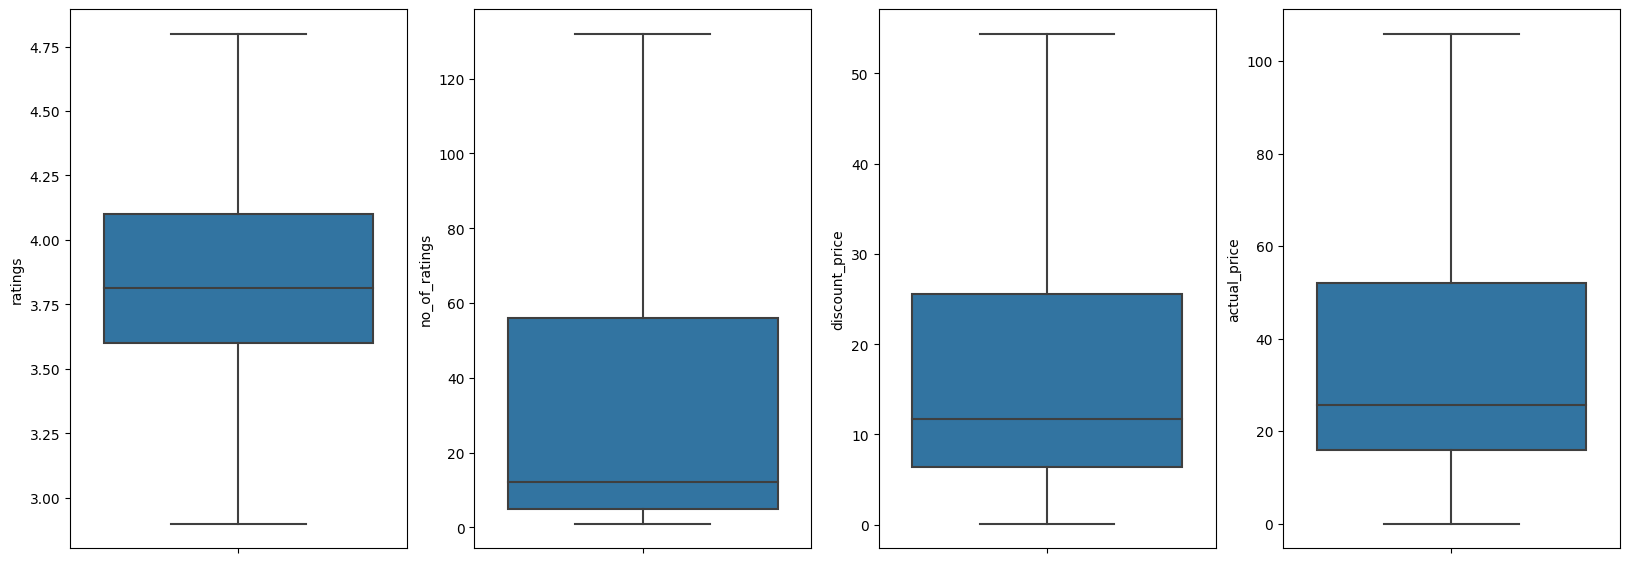

In [412]:
cols = ['ratings','no_of_ratings','discount_price','actual_price']
fig, axes = plt.subplots(1,len(cols),figsize=(20,7))
for i, col in enumerate(cols):
    ax = sns.boxplot(y=amazon_copy2[col],ax=axes.flatten()[i],showfliers=False)
    ax.set_ylabel(col)
plt.show()

Lets visualize the boxplots with outliers now

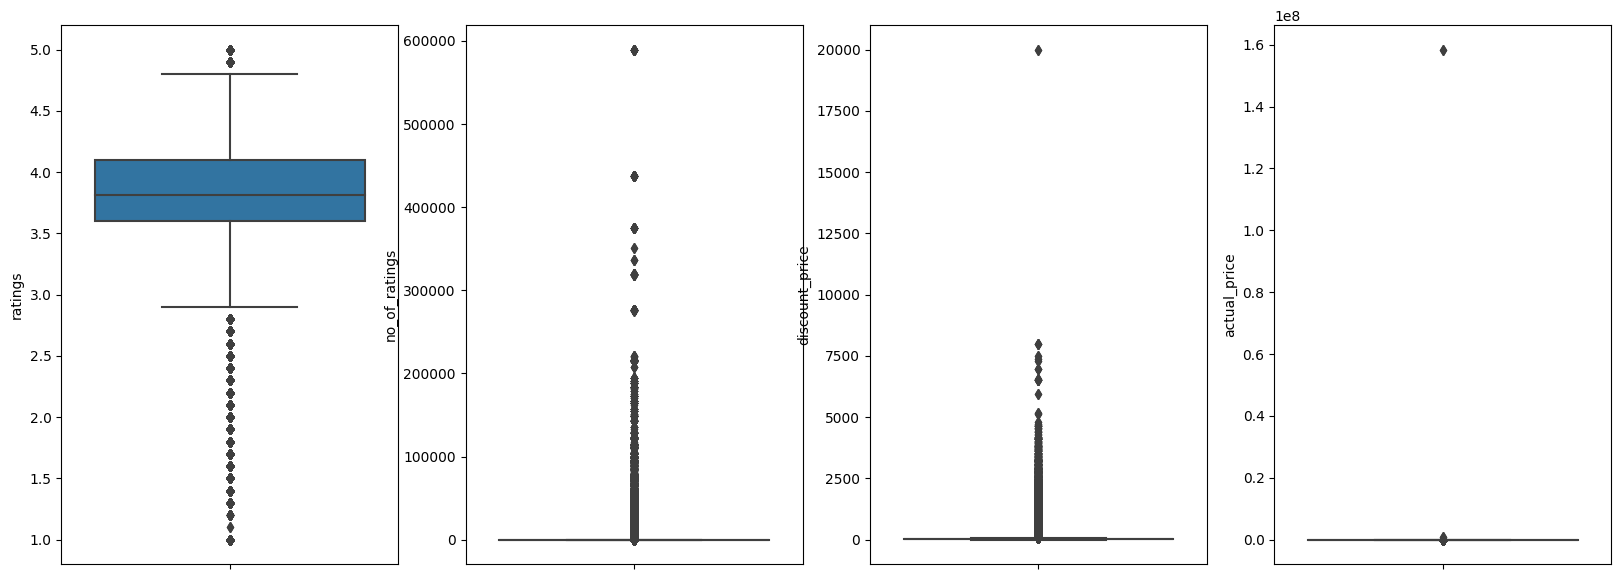

In [413]:
cols = ['ratings','no_of_ratings','discount_price','actual_price']
fig, axes = plt.subplots(1,len(cols),figsize=(20,7))
for i, col in enumerate(cols):
    ax = sns.boxplot(y=amazon_copy2[col],ax=axes.flatten()[i])
    ax.set_ylabel(col)
plt.show()

The outliers present in the ratings are most likely legitmate data points, same with  
many of the outliers present in the other 3, however there are some that need to be removed,  
it's not very likely that there was a product for sale for 1.6 million CAD, or discounted for  
20000, or has 600000 reviews

In [438]:
amazon_copy3 = amazon_copy2.copy()

In [439]:
amazon_copy2 = amazon_copy2.drop(amazon_copy2[(amazon_copy2['no_of_ratings'] > 100000)].index)
amazon_copy2 = amazon_copy2.drop(amazon_copy2[(amazon_copy2['discount_price'] > 2500)].index)
amazon_copy2 = amazon_copy2.drop(amazon_copy2[(amazon_copy2['actual_price'] > 5000)].index)

In [440]:
amazon_copy2.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,main_category,sub_category,ratings,no_of_ratings,discount_price,actual_price
count,1049634.00000,1049634.00000,1049634.00000,1049634.00000,1049634.00000,1049634.00000
mean,9.51736,56.99863,3.80649,388.24711,42.86719,73.51852
std,6.86153,30.20760,0.62570,2969.65433,127.24633,173.46656
min,0.00000,0.00000,1.00000,1.00000,0.12800,0.00000
25%,1.00000,35.00000,3.59870,5.00000,6.38400,15.98400
50%,10.00000,58.00000,3.81351,11.00000,11.74400,25.58400
75%,17.00000,85.00000,4.10000,52.00000,25.60000,52.09676
max,19.00000,111.00000,5.00000,99745.00000,2492.62400,4799.84000


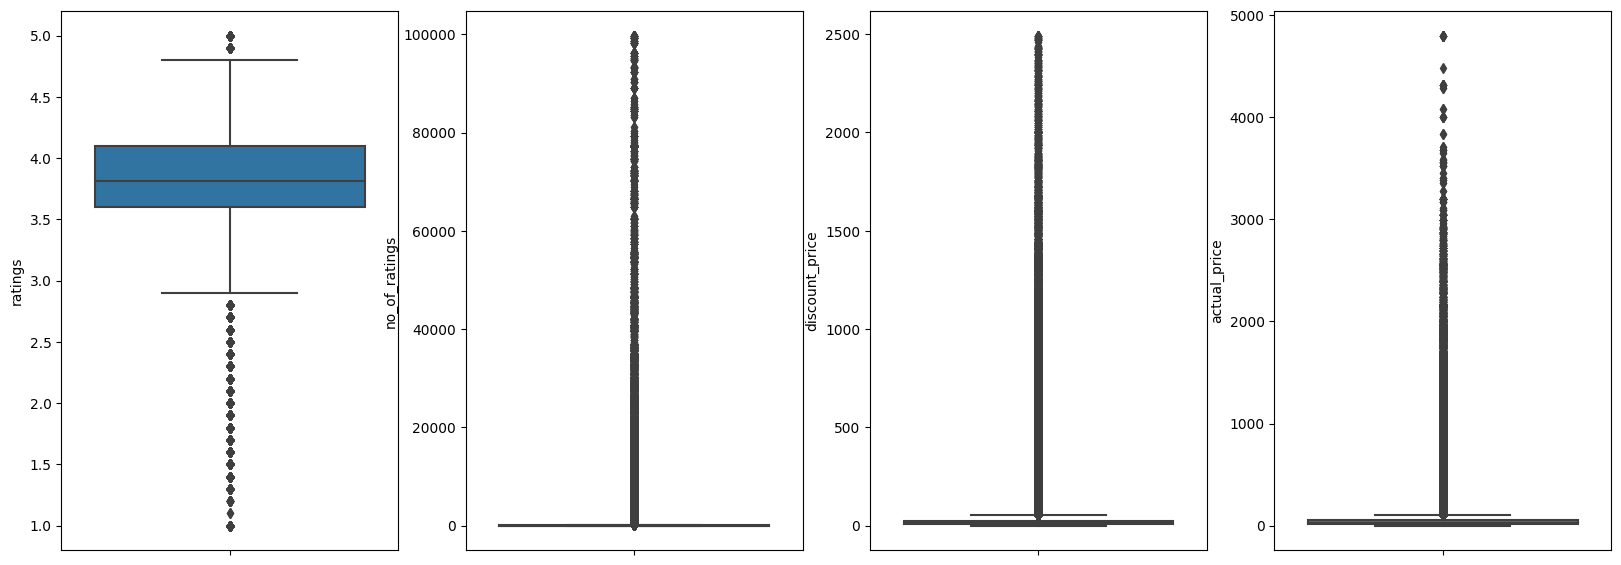

In [441]:
cols = ['ratings','no_of_ratings','discount_price','actual_price']
fig, axes = plt.subplots(1,len(cols),figsize=(20,7))
for i, col in enumerate(cols):
    ax = sns.boxplot(y=amazon_copy2[col],ax=axes.flatten()[i])
    ax.set_ylabel(col)
plt.show()

Lets take a look at how the different columns are distributed

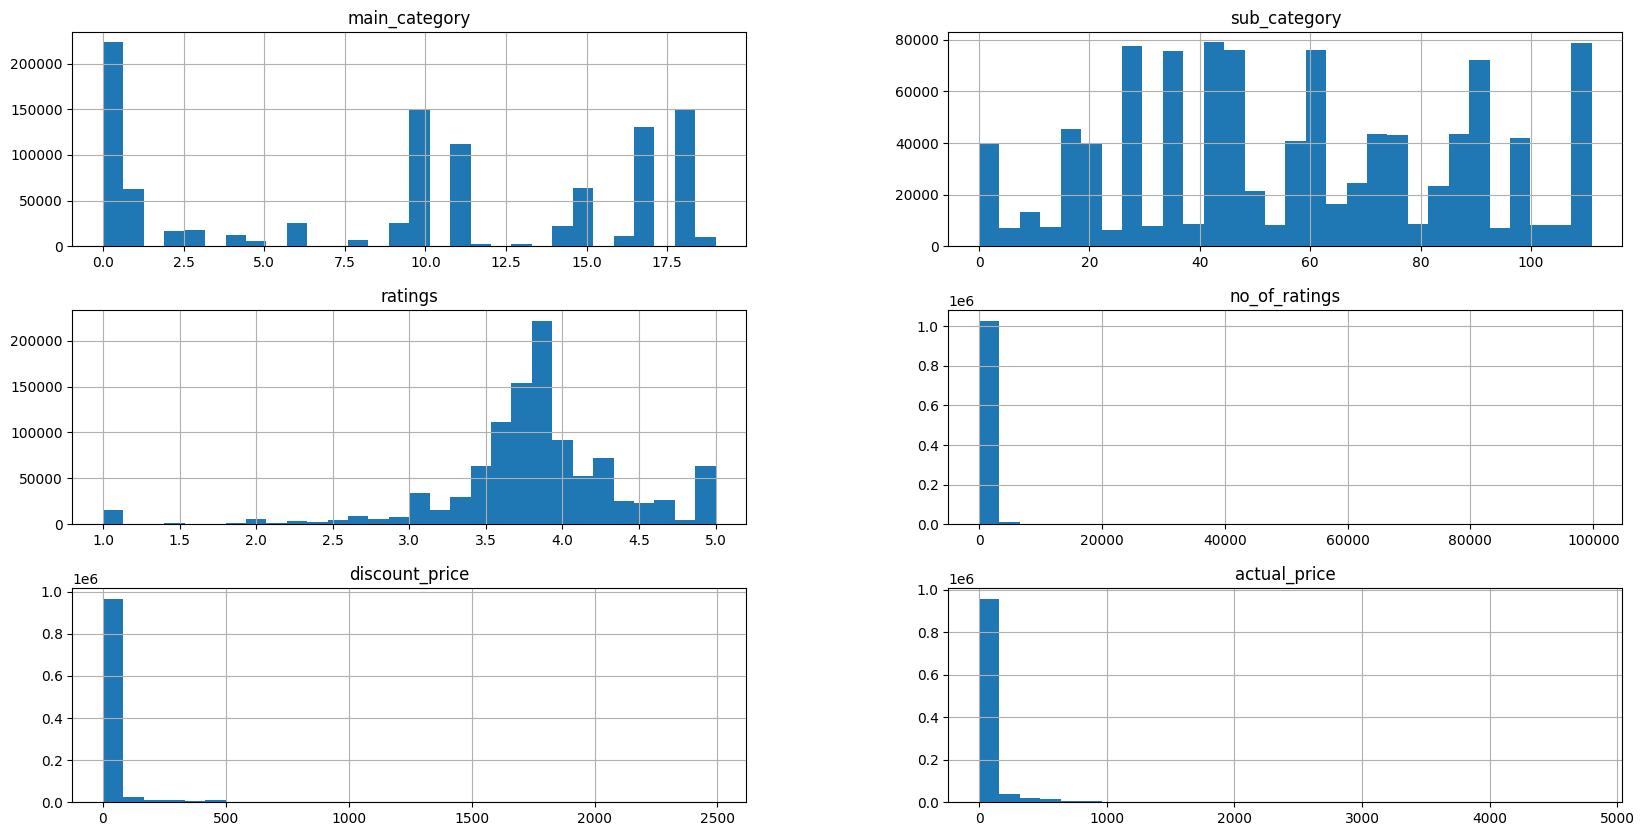

In [447]:
amazon_copy2.hist(figsize=(20,10),bins=30)
plt.show()

Aside from the ratings column, none of the data looks to be normally distributed

Lets create a heatmap and pairplots to see how the columns are correlated

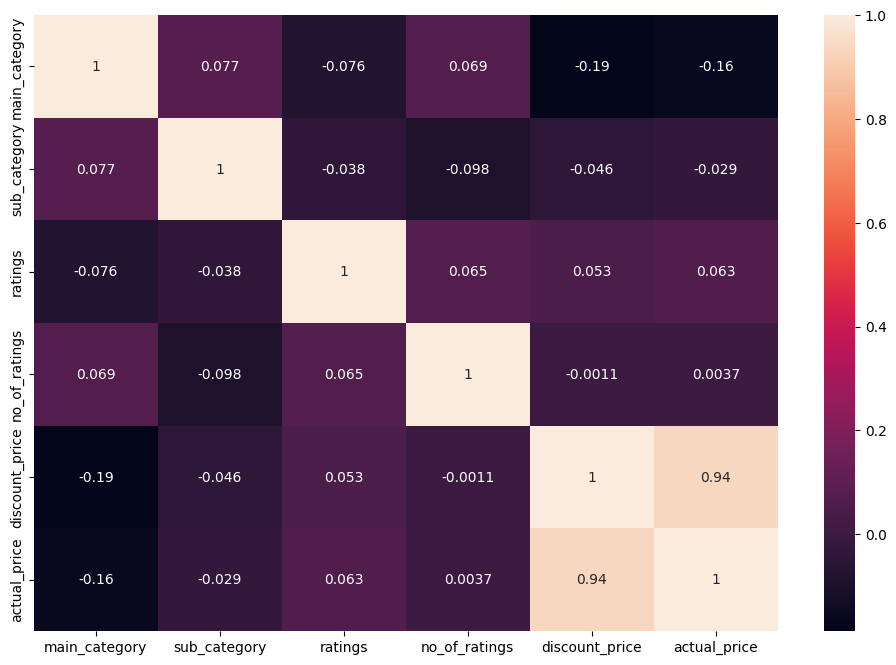

In [450]:
corr = amazon_copy2.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr,annot=True)
plt.show()

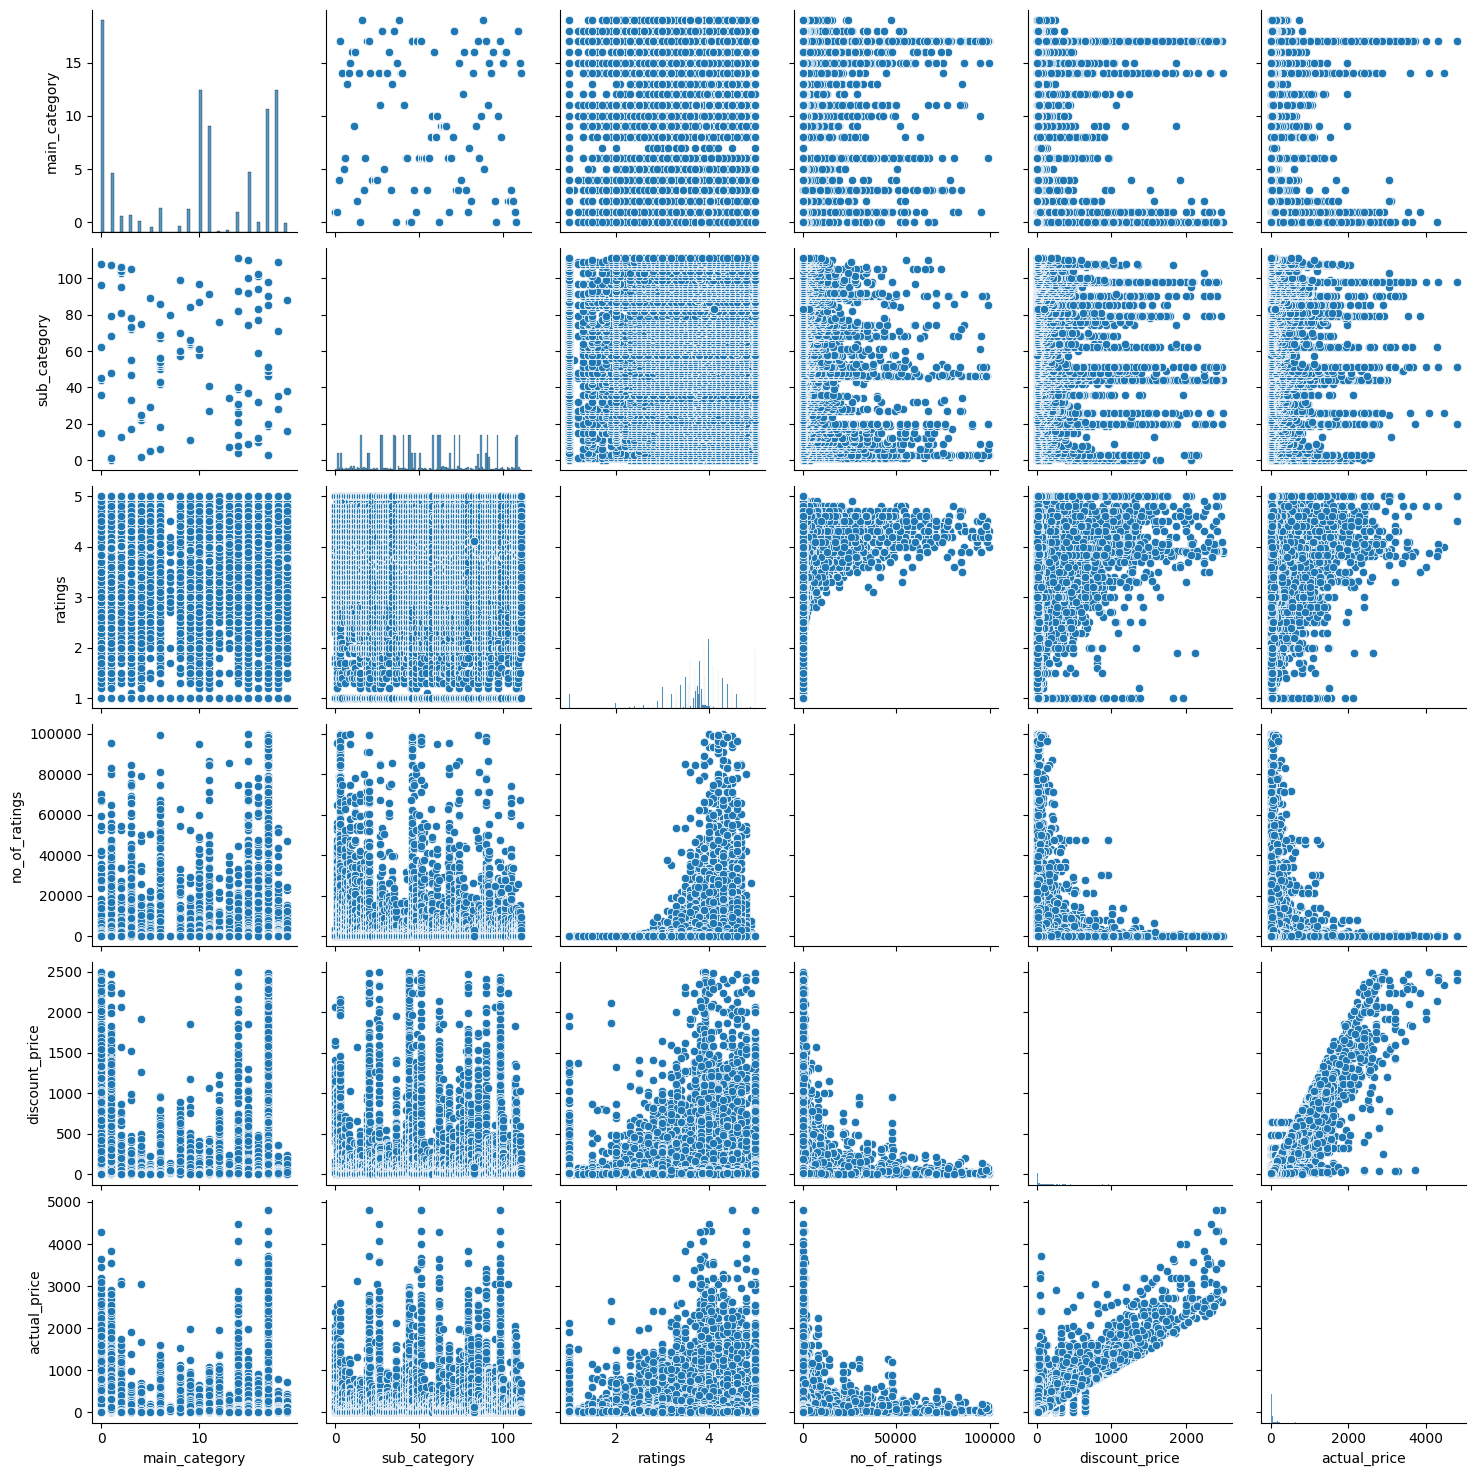

In [451]:
sns.pairplot(data=amazon_copy2)

There does not look to be any strong correlations between the variates, aside from discount_price and  
actual_price, which is what we'd expect beforehand, we can see some relationships between other variates like  
the number of rations and discount price, and ratings and number of ratings

In [452]:
amazon_copy2.to_csv('clean_data/amazon_sales.csv',index=False)